In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\ML competition\\Adopt buddy\\Dataset\\train.csv")

In [3]:
df=data

In [4]:
df.fillna(df.mean(),inplace=True)
df.isna().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [5]:
color=['Brown Tabby','White', 'Brown', 'Black', 'Red', 'Tricolor', 'Calico Point', 'Brown Brindle','Blue','Tortie','Gray','Fawn','Buff','Torbie','Orange Tabby','Sable','Tan','Blue Tick','Orange','Blue Tabby','Chocolate','Black Tabby','Black Brindle','Cream Tabby','Gold','Blue Merle','Calico','Red Merle','Yellow','Lynx Point','Blue Cream','Flame Point','Cream','Yellow Brindle','Blue Tiger','Seal Point','Red Tick','Brown Merle','Black Smoke','Gray Tabby','Green','Tortie Point','Blue Smoke','Apricot','Blue Point','Silver Tabby','Lilac Point','Silver','Brown Tiger','Liver','Agouti','Chocolate Point','Liver Tick','Pink','Black Tiger','Silver Lynx Point']
col=pd.DataFrame(color,columns=['color_type'])

In [6]:
le=preprocessing.LabelEncoder()
le.fit(color)
list(le.classes_)
df["color_type"]=le.transform(df["color_type"])

In [7]:
df.describe()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,24.560529,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.739606,19.432010,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,18.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,48.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,55.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [8]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.00000,18,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.00000,53,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,0.88339,15,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.00000,53,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.00000,2,0.50,11.06,18,4,0.0,1


In [9]:
X=df[['color_type','height(cm)','X1','condition']]
Y=df[['breed_category']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [11]:
x_train_val=X_train.values
y_train_val=y_train.values
x_val=X_test.values
y_val=y_test.values

In [12]:
corr=df.corr()

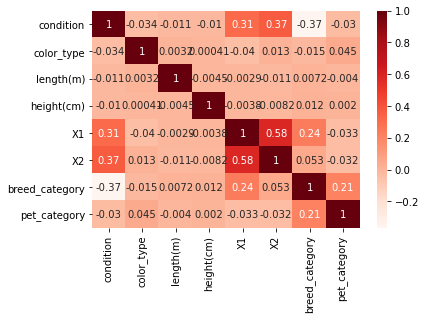

In [13]:
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [14]:
import lightgbm as lgb  

In [15]:
dtree_model = lgb.LGBMClassifier()
dtree_model.fit(X_train,y_train)

LGBMClassifier()

In [16]:
dtree_predictions = dtree_model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
acc=classification_report(y_test,dtree_predictions)
print(acc)

precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      2255
         1.0       0.90      0.87      0.89      2094
         2.0       1.00      1.00      1.00       360

    accuracy                           0.90      4709
   macro avg       0.93      0.93      0.93      4709
weighted avg       0.90      0.90      0.90      4709



In [19]:
test_data=pd.read_csv("D:\\ML competition\\Adopt buddy\\Dataset\\test.csv")

In [20]:
test_df=test_data[['color_type','height(cm)','X1','condition']]
test_df.isna().sum()

color_type      0
height(cm)      0
X1              0
condition     619
dtype: int64

In [21]:
test_df.fillna(df.mean(),inplace=True)
test_df.isna().sum()

color_type    0
height(cm)    0
X1            0
condition     0
dtype: int64

In [22]:
test_df["color_type"]=le.transform(test_df["color_type"])

In [23]:
y_pred=dtree_model.predict(test_df)

In [24]:
subm=test_data['pet_id']
subm_df=pd.DataFrame({"pet_id": subm, 
                  "breed_category": y_pred})
subm.isna().sum()

0

In [25]:
subm_df.to_csv('submission_breed.csv', index=False)